# provide a brief description/characteristic of the instagram profile/persona

In [31]:
# description = "blue haired female yoga instructor focused on wellness content creation"
# description = "a car enthusiast who loves to travel and explore new places"
# description = "short hair girl doing hair tutorials for instagram"
description = "a digital nomad who loves to travel and explore new places, works in finance and loves to cook"

# ollama <> phi3

In [32]:
from langchain_community.llms import Ollama
from langchain_core.output_parsers import JsonOutputParser
from PIL import Image
import matplotlib.pyplot as plt
import os
import glob
import requests

prompt = """
"system": "you are a highly skilled copywriter for a social media profiles like instagram, you will be given a {description} of a person and you will need to write:

1. a creative instagram post IDEA / CONCEPT
2. then you will write a DALL-E prompt to generate image for that post
3. then you will write a brief text caption with 25 hashtags for this post

the response should be a JSON file with ['idea','prompt', 'caption'] as keys and corresponding output as values"
"""
prompt += f"""\n"user": "description: {description}" """

model = Ollama(model="phi3")
parser = JsonOutputParser()
chain = model | parser

out = chain.invoke(prompt)

# run draw things api here

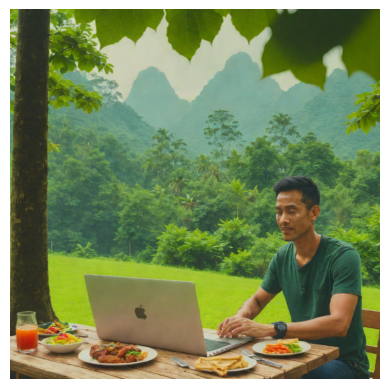

In [33]:
# Define the API endpoint URL
url = "http://localhost:7860/sdapi/v1/txt2img"
payload = {"prompt": out["prompt"]}

response = requests.post(url, json=payload)

def get_latest_file():
    os.chdir("/Users/mikolaj/Projects/stable_diff")
    list_of_files = glob.glob('*.png')
    latest_file = max(list_of_files, key=os.path.getctime)
    return latest_file

def show_image():
    img = Image.open(get_latest_file())
    plt.axis('off')
    plt.imshow(img)
    
if response.status_code == 200:
    show_image()
else:
    print(f"Error: {response.status_code}")

In [34]:
out["caption"]

"🌏 Exploring new horizons & flavors! 🌍✈️ As a finance wizard turned digital nomad, I'm savoring the taste of life one dish at a time. #DigitalNomadLife #FinanceFreedom #CulinaryJourney #TravelPassion #CookingAdventures #ScenicEscape #WorkFromAnywhere #GlobalGastronomy #PastelParis #SushiInSanFrancisco #MangoStrollsThroughMorocco #ArabianNightsDinner #BudgetBackpacker #CryptoChef #FoodieFinds #EpicureanExpeditions #ExoticEats #WorldlyWanderlust #AdventurousAtHeart #TravelTrends #HappyTrails #SunsetsAndStocks #TasteOfTheTrail #UnchartedCuisines #MoneyMeetsCulture #BalanceBeacon #DreamDestinations #InvestingWhileExploring #FoodLoversUnite"

# run notion api here

In [35]:
# todo